# Berchmarking Dataset for image classification of sklearn

In [17]:
#---------------
# import modules
#---------------

import numpy as np
import joblib as jb
import matplotlib.pyplot as plt

#datasets
from sklearn.datasets import make_circles

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.neural_network import MLPClassifier
from neuralNetwork.perceptron_qpso import perceptron 
from neuralNetwork.perceptron_pso import perceptron_pso
from neuralNetwork.perceptron_pso_bound import perceptron_pso_bound  


## Circle Dataset

In [18]:
#----------------
#Circle dataset
#----------------
n = 500 #register number
#p = 2 #featurs over our data

#generating the input X and output y (binary vector)
X_org, y_org = make_circles(n_samples=n, factor=0.1, noise=0.03, random_state=7)
#y = y[:, np.newaxis]

print('Shape of X: ', X_org.shape)
print('Shape of y: ', y_org.shape)

Shape of X:  (500, 2)
Shape of y:  (500,)


(500, 2) (500,)


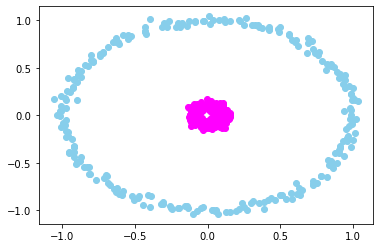

In [19]:
X = X_org
y = y_org
print(X.shape, y.shape)
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.show()

In [20]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_org, y_org, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({1: 208, 0: 192})
Testing target statistics: Counter({0: 58, 1: 42})


In [21]:
# Global variables
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

n_particulas = 100
max_iter = 100
n_training = 10

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal


### QPSO optimizer

In [ ]:
#---------------------------------------
# variable initialize for qpso algorithm
#---------------------------------------
beta = 1.13 #1.13

gBest_value = []
gBest = []
cost_test = []
metric_train = []

for i in range(n_training):
    # load perceptron
    nn = perceptron(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, beta, n_particulas, max_iter) )
    gBest_value.append(nn.g_best_value)
    metric_train.append(nn.g_best_value_iter)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:       
        np.save("qdpso_circle_gBest_113_100_100_2.npy", gBest[i])
        np.save("qdpso_circle_gBestIter_113_100_100_2.npy", nn.g_best_value_iter)
        np.save("qdpso_circle_avgBest_113_100_100_2.npy", nn.avg_best_value)
        np.save("qdpso_circle_stdBest_113_100_100_2.npy", nn.std_best_value)
        
print("=====================================================================")
print("=====================================================================")
print("Save train metric ....")
np.save("qdpso_circle_metric_113_100_100_2.npy", metric_train)
print("The best training is in iteration: ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [23]:
model_load = np.load('qdpso_circle_gBest_113_100_100_2.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.0  ACC score:  1.0
MSE:  0.0  ACC score:  1.0


### PSO optimizer

In [ ]:
#---------------------------------------
# variable initialize for pso algorithm
#---------------------------------------
opt = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

gBest_value = []
gBest = []
cost_test = []
metric_train = []


for i in range(n_training):
    # load perceptron
    nn = perceptron_pso(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, opt, n_particulas, max_iter) )
    gBest_value.append(nn.best_cost)
    metric_train.append(nn.h_cost)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost: 
        np.save("pso_circle_gBest_113_100_100_2.npy", gBest[i])
        np.save("pso_circle_gBestIter_113_100_100_2.npy", nn.h_cost)
        np.save("pso_circle_avgBest_113_100_100_2.npy", nn.avg_best_value)
        #np.save("pBest_113_100_100_2_5_1.npy", nn.h_pos)
        
print("=====================================================================")
print("=====================================================================")
print("Saving train metric .... ")
np.save("pso_circle_metric_113_100_100_2.npy", metric_train)
print("The best training is in iteration ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [25]:
model_load = np.load('pso_circle_gBest_113_100_100_2.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.0  ACC score:  1.0
MSE:  0.0  ACC score:  1.0


### PSO_bound optimizer

In [ ]:
#---------------------------------------
# variable initialize for pso algorithm
#---------------------------------------
opt = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

gBest_value = []
gBest = []
cost_test = []
metric_train = []


for i in range(n_training):
    # load perceptron
    nn = perceptron_pso_bound(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, opt, n_particulas, max_iter) )
    gBest_value.append(nn.best_cost)
    metric_train.append(nn.h_cost)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost: 
        np.save("pso_circle_gBest_113_100_100_2.npy", gBest[i])
        np.save("pso_circle_gBestIter_113_100_100_2.npy", nn.h_cost)
        np.save("pso_circle_avgBest_113_100_100_2.npy", nn.avg_best_value)
        #np.save("pBest_113_100_100_2_5_1.npy", nn.h_pos)
        
print("=====================================================================")
print("=====================================================================")
print("Saving train metric .... ")
np.save("pso_circle_metric_113_100_100_2.npy", metric_train)
print("The best training is in iteration ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [27]:
model_load = np.load('pso_circle_gBest_113_100_100_2.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.11  ACC score:  0.89
MSE:  0.145  ACC score:  0.855


### Adam optimizer

In [ ]:
cost_test = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='adam', max_iter=max_iter, alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'adam_circle_model_113_100_100_2.sav'
        jb.dump(clf, filename)

In [29]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.22  ACC score:  0.78
MSE:  0.28  ACC score:  0.72


### lbfgs optimizer

In [ ]:
cost_test = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='lbfgs', max_iter=max_iter, alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'lbfgs_circle_model_113_100_100_2.sav'
        jb.dump(clf, filename)

In [31]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.0  ACC score:  1.0
MSE:  0.0  ACC score:  1.0


### SGD optimizer

In [ ]:
cost_test = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='sgd', max_iter=max_iter, alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'sgd_circle_model_113_100_100_2.sav'
        jb.dump(clf, filename)

In [33]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)
print('MSE: ', cost_test_load, ' ACC score: ', acc_test_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)
print('MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print("=====================================================================")
print("=====================================================================")

MSE:  0.22  ACC score:  0.78
MSE:  0.1225  ACC score:  0.8775
